## Projeto 1 - Trans cal 

Luiza Coutinho /
Daniel Marco /
Gabriel Buhrer /
Fernando Koelle


Sistema par

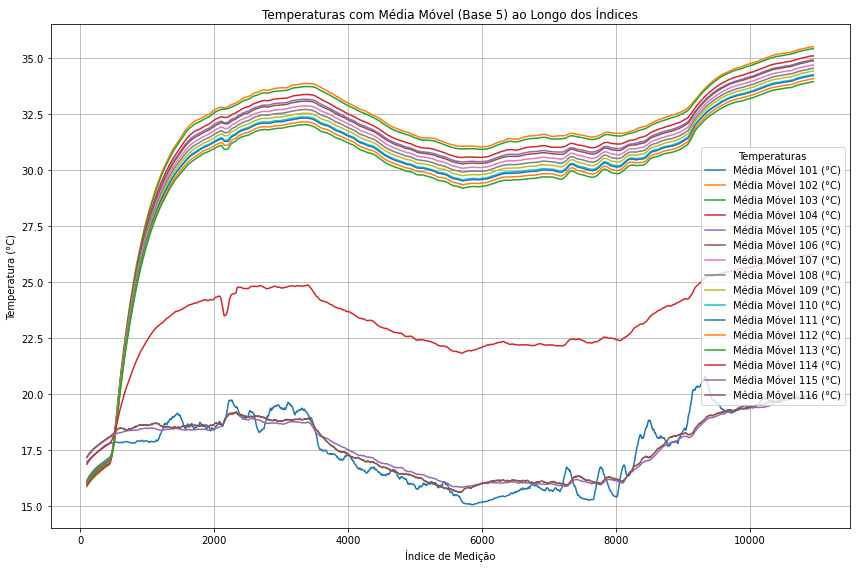

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados a partir da linha correta (linha 40)
df_data_corrected = pd.read_excel('dados.xlsx', sheet_name='Planilha1')

# Colunas de temperatura que iremos usar
temperature_columns = [f'{i} (°C)' for i in range(101, 117)]

# Criar uma coluna de índices de 1 até o tamanho das medições de temperatura
df_data_corrected['Index'] = range(1, len(df_data_corrected) + 1)

# Aplicar a média móvel com base 5 em cada coluna de temperatura
df_data_corrected_moving_avg = df_data_corrected.copy()
for temp_col in temperature_columns:
    df_data_corrected_moving_avg[temp_col] = df_data_corrected[temp_col].rolling(window=100).mean()

# Plotar o gráfico com os índices e a média móvel
plt.figure(figsize=(12, 8))

for temp_col in temperature_columns:
    plt.plot(df_data_corrected_moving_avg['Index'], df_data_corrected_moving_avg[temp_col], label=f'Média Móvel {temp_col}')

# Adicionar título e rótulos aos eixos
plt.title('Temperaturas com Média Móvel (Base 5) ao Longo dos Índices')
plt.xlabel('Índice de Medição')
plt.ylabel('Temperatura (°C)')
plt.legend(title='Temperaturas')
plt.grid(True)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


# Exercício 1

| Propriedade               | Valor   |
|---------------------------|---------|
| Número do sistema          | 2       |
| Resistência elétrica (Ω)   | 6,5     |
| Tensão Aplicada (V)        | 100     |


# Exercicio 2

Achando equação da reta para realizar a interpolação e descobrir k_t da nossa Temperatura de filme

Calculando médias gerais de cada ponto da aleta

Calculando Tf a partir das médias

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar o arquivo Excel
file_path = 'dados.xlsx'
df = pd.read_excel(file_path, sheet_name='Planilha1')

# Definir as linhas de interesse
start_row = 5364
end_row = 7543

# Definir as colunas de interesse (12 pontos)
coluna_t_amb = ['101 (°C)']
coluna_t_base = ['102 (°C)']
colunas_desejadas = [f"{i} (°C)" for i in range(102, 114)]

# Calcular as médias das colunas entre as linhas especificadas
media_t_amb = df.loc[start_row:end_row, coluna_t_amb].mean().values[0]
media_t_base = df.loc[start_row:end_row, coluna_t_base].mean().values[0]
medias_aleta = df.loc[start_row:end_row, colunas_desejadas].mean().tolist()


media_total =pd.Series(medias_aleta).mean()

Tf= (media_total+media_t_amb)/2
print (media_total)
# print(media_t_amb)
# print(Tf)

30.36207603211007


Descobrindo k a partir de Tf

In [4]:
a = (156.88 - 155.68) / (51.67 - 37.38)

def acha_t(T):
    k_t = a*T - a*37.78 + 155.68
    return k_t


K_tf = acha_t(Tf)
print (f"k é igual a:{0}",(K_tf))

k é igual a:0 154.43774832114588


# Exercício 3


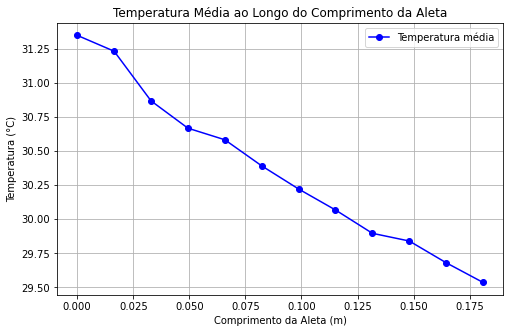

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar o arquivo Excel
file_path = 'dados.xlsx'
df = pd.read_excel(file_path, sheet_name='Planilha1')

# Definir as linhas de interesse
start_row = 5364
end_row = 7543

# Definir as colunas de interesse (12 pontos)
coluna_t_amb = ['101 (°C)']
coluna_t_base = ['102 (°C)']
colunas_desejadas = [f"{i} (°C)" for i in range(102, 114)]

# Calcular as médias das colunas entre as linhas especificadas
media_t_amb = df.loc[start_row:end_row, coluna_t_amb].mean().values[0]
media_t_base = df.loc[start_row:end_row, coluna_t_base].mean().values[0]
medias_aleta = df.loc[start_row:end_row, colunas_desejadas].mean().tolist()

# Criando o eixo x para representar o comprimento da aleta (0 a 0.181 metros com 12 pontos)
comprimento = np.linspace(0, 0.181, 12)

# Plotando o gráfico
plt.figure(figsize=(8, 5))
plt.plot(comprimento, medias_aleta, marker='o', color='blue', label='Temperatura média')
plt.title('Temperatura Média ao Longo do Comprimento da Aleta')
plt.xlabel('Comprimento da Aleta (m)')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.legend()
plt.show()




# Exercicío 4

31.35


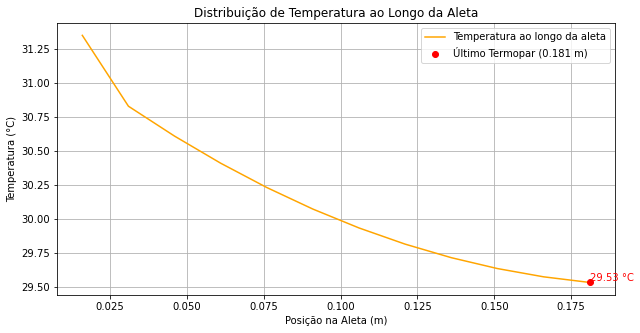

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

def acha_k(T):
    a = (156.88 - 155.68) / (51.67 - 37.38)
    k_t = a * T - a * 37.78 + 155.68
    return k_t

# Parâmetros e configuração
L = 0.2  # Comprimento total da aleta em metros
R = 0.012  # Raio da aleta em metros
L_termopar = 0.181  # Posição do último termopar em metros
T_base = 31.35  # Temperatura na base em °C
T_ambiente = 15.61  # Temperatura ambiente em °C
theta_b = T_base - T_ambiente
Atr = math.pi * (R**2)  # Área transversal em m²
p = 2 * math.pi * R  # Perímetro em metros
k = acha_k(30.43)  # Chamada da função para calcular k
h = 5.7  # Valor estimado de h
m = np.sqrt((h * p) / (k * Atr))  # Cálculo de m

# Função de distribuição de temperatura considerando convecção na extremidade
def temperatura(m, l, h, x, k):
    num = math.cosh(m * (l - x)) + ((h / (m * k)) * (math.sinh(m * (l - x))))
    den = math.cosh(m * l) + ((h / (m * k)) * (math.sinh(m * l)))
    return num / den

# Preparando valores de x e calculando a temperatura
x_vals = [0.016, 0.031, 0.046, 0.061, 0.076, 0.091, 0.106, 0.121, 0.136, 0.151, 0.166, 0.181]
theta_vals = [T_base,0,0,0,0,0,0,0,0,0,0,0]

contador = 0
for x in x_vals:
    if x_vals[contador] == 0.016:
        pass
    else:
        theta_vals[contador] = ((theta_b*temperatura(m, L, h, x, k)) + T_ambiente)
    contador+=1

# Encontrando o valor da temperatura no último termopar (x = 0.181)
idx_termopar = x_vals.index(0.181)
temp_termopar = theta_vals[idx_termopar]
print(theta_vals[0])
# Plotando o gráfico
plt.figure(figsize=(10, 5))
plt.plot(x_vals, theta_vals, color='orange', label='Temperatura ao longo da aleta')
plt.scatter([L_termopar], [temp_termopar], color='red', zorder=5, label='Último Termopar (0.181 m)')
plt.text(L_termopar, temp_termopar, f'{temp_termopar:.2f} °C', color='red', fontsize=10, verticalalignment='bottom')
plt.title('Distribuição de Temperatura ao Longo da Aleta')
plt.xlabel('Posição na Aleta (m)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()


# Exercicío 5

Erro máximo na iteração 0: 0.0012457073143394837
Erro máximo na iteração 1: 0.0012413681962115675
Erro máximo na iteração 2: 0.00123706556989589
Erro máximo na iteração 3: 0.0012327991174601038
Erro máximo na iteração 4: 0.001228568523753637
Erro máximo na iteração 5: 0.001224373476368612
Erro máximo na iteração 6: 0.0012202136656398466
Erro máximo na iteração 7: 0.0012160887845880097
Erro máximo na iteração 8: 0.001211998528933833
Erro máximo na iteração 9: 0.0012079425970341617
Erro máximo na iteração 10: 0.0012039206898961652
Erro máximo na iteração 11: 0.0011999325111240466
Erro máximo na iteração 12: 0.0011959777669225957
Erro máximo na iteração 13: 0.0011920561660510032
Erro máximo na iteração 14: 0.0011881674198122028
Erro máximo na iteração 15: 0.0011843112420280022
Erro máximo na iteração 16: 0.0011804873490284251
Erro máximo na iteração 17: 0.001176695459601973
Erro máximo na iteração 18: 0.0011729352950027305
Erro máximo na iteração 19: 0.0011692065789183914
Erro máximo na i

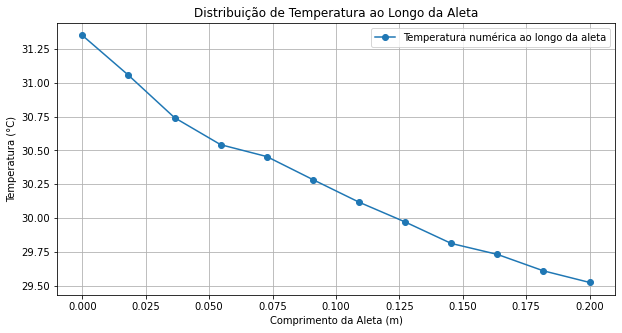

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

def acha_k(T):
    a = (156.88 - 155.68) / (51.67 - 37.38)
    k_t = a*T - a*37.78 + 155.68
    return k_t

# Parâmetros e configuração
L = 0.2  # Comprimento total da aleta em metros
delta_x = 0.015
L_termopar = 0.181  # Posição do último termopar em metros
T_base = 31.35  # Temperatura na base em °C
T_ambiente = 15.61  # Temperatura ambiente em °C
theta_0 = T_base - T_ambiente
delta_t = 0.01
Atr = math.pi * (0.012**2)  # Área transversal
As = 2 * math.pi * 0.012 * L  # Área superficial
k = acha_k(30.43)  # Chamada da função para calcular k
h = 5.7  # Valor estimado de h
c = 880
rho = 2794
lista_temps = [T_base, 31.135, 30.773, 30.572,  30.541, 30.34, 30.17, 30.036, 29.846, 29.803, 29.665, 29.499]
lista_new_temps = [T_base, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
n = 12
erro = 100000000000
erro_max = 0
contador = 0

while erro > 0.001:
    erro_max = 0
    for i in range(0, n):
        if i != 0:
            if i != 11:
                lista_new_temps[i] = lista_temps[i] + (delta_t / (c * rho * Atr * delta_x)) * (
                    (k * Atr / delta_x) * (lista_temps[i-1] - 2 * lista_temps[i] + lista_temps[i+1]) - h * As * (lista_temps[i] - T_ambiente))
            else:
                lista_new_temps[i] = lista_temps[i] + (delta_t / (c * rho * Atr * delta_x)) * (
                    (k * Atr / delta_x) * (lista_temps[i-1] - lista_temps[i]) - h * Atr * (lista_temps[i] - T_ambiente))
            
            erro_local = abs(lista_new_temps[i] - lista_temps[i])
            if erro_local > erro_max:
                erro_max = erro_local

    erro = erro_max
    print(f"Erro máximo na iteração {contador}: {erro}")            
    contador += 1            
    lista_temps = lista_new_temps.copy()  # Fazendo uma cópia correta dos valores

# Plotando os resultados
print(f'Número de iterações: {contador}')
print(f'Erro máximo: {erro_max}')
x_vals = np.linspace(0, L, n)  # Coordenadas dos pontos de discretização

plt.figure(figsize=(10, 5))
plt.plot(x_vals, lista_temps, label='Temperatura numérica ao longo da aleta', marker='o')
plt.title('Distribuição de Temperatura ao Longo da Aleta')
plt.xlabel('Comprimento da Aleta (m)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()





# Exercicío 6

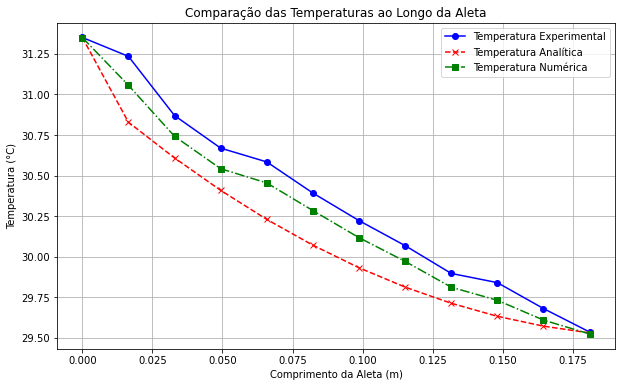

In [8]:
import matplotlib.pyplot as plt
import numpy as np


comprimento = np.linspace(0, 0.181, 12)  # Eixo x comum para todos os gráficos

# Dados das três curvas 
temperatura_experimental = medias_aleta  # Temperatura medida experimentalmente
temperatura_analitica = theta_vals  # Dados analíticos
temperatura_numerica = lista_temps  # Dados numéricos

# Plotando as três curvas no mesmo gráfico
plt.figure(figsize=(10, 6))
plt.plot(comprimento, temperatura_experimental, marker='o', linestyle='-', color='blue', label='Temperatura Experimental')
plt.plot(comprimento, temperatura_analitica, marker='x', linestyle='--', color='red', label='Temperatura Analítica')
plt.plot(comprimento, temperatura_numerica, marker='s', linestyle='-.', color='green', label='Temperatura Numérica')

# Configurações do gráfico
plt.title('Comparação das Temperaturas ao Longo da Aleta')
plt.xlabel('Comprimento da Aleta (m)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()
